# Question 3

## Automated Defect Detection System for Concrete Blocks Using Vision-Based Machine Learning Model








### Explanation:
The manual separation of defectless and defective concrete blocks is inefficient, costly, and prone to errors. To address this, a new system is proposed that utilizes a vision-based RGB camera system to classify concrete blocks as defectless or defective.

#### Importing all needed libraries

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### Creating a function to load images from a folder

In [24]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    count = 0

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            images.append(img)
            labels.append(label)
            count += 1

    print(count, "labeled as", label)
    return images, labels

#### Creating all other requested functions

In [25]:
def image_enhancement(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def feature_extraction(image):
    mean_intensity = np.mean(image)
    features = np.array([mean_intensity])
    return features

def feature_normalization(features):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    return features_scaled

def traintestsplit(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def classifier_training(X_train, y_train):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    return clf

def classifier_testing(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    return y_pred

#### Creating main program 
Here we will extract the images from the folder using the load_images_from_folder function created earlier. 
We also print some sample images to make sure file path integrity was established. 
The program will execute all the functions one by one and create the desired output. 


19990 labeled as 1
19990 labeled as 0
39980


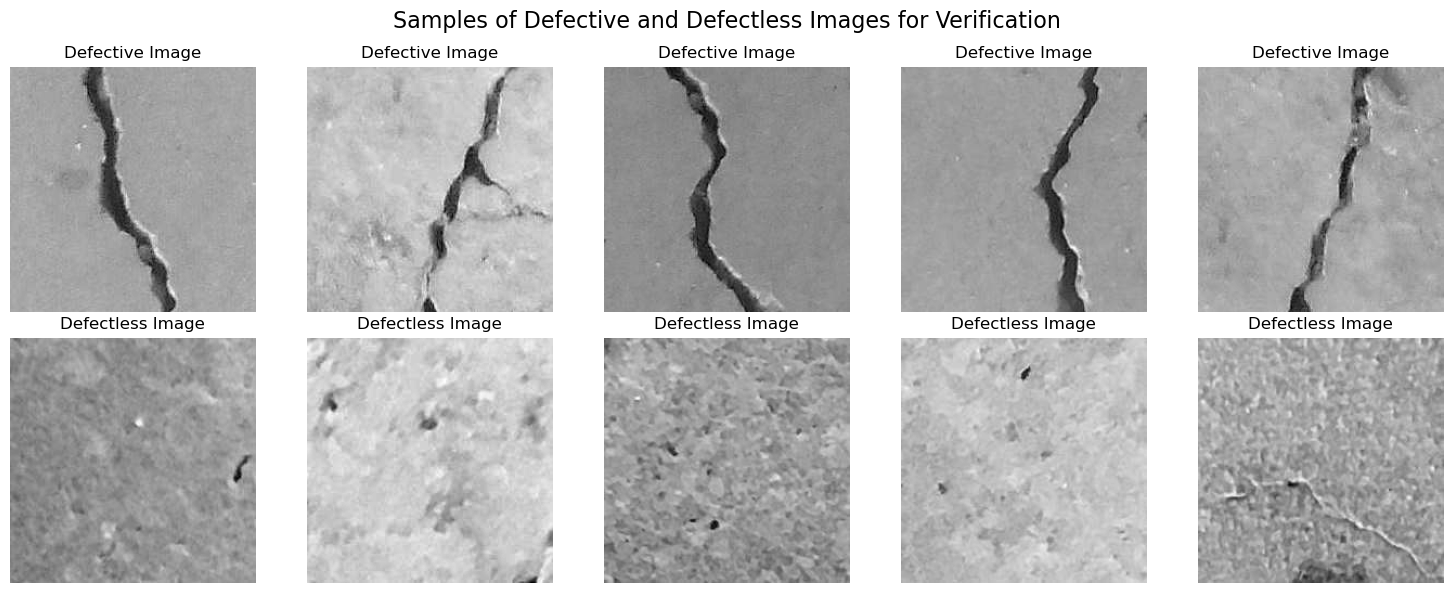

Confusion Matrix:
 [[2890 1096]
 [1157 2853]]
Accuracy: 71.82%


In [26]:
def main():
    #Define paths
    defective_folder = r"C:\Users\stefw\Desktop\ITMLA Assignment Python\itmla3_project_dataset\CONCRETE CRACKS\Defective"
    defectless_folder = r"C:\Users\stefw\Desktop\ITMLA Assignment Python\itmla3_project_dataset\CONCRETE CRACKS\Defectless"

    #Load images
    defective_images, defective_labels = load_images_from_folder(defective_folder, 1)
    defectless_images, defectless_labels = load_images_from_folder(defectless_folder, 0)

    #Combine images and labels
    X = defective_images + defectless_images
    y = defective_labels + defectless_labels

    print(len(X))

    # Sample images for visualization
    sample_defective_images = defective_images[:10]
    sample_defectless_images = defectless_images[:10]

    #Plot sample images
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i in range(5):
        axes[0, i].imshow(sample_defective_images[i], cmap='gray')
        axes[0, i].set_title('Defective Image')
        axes[0, i].axis('off')

        axes[1, i].imshow(sample_defectless_images[i], cmap='gray')
        axes[1, i].set_title('Defectless Image')
        axes[1, i].axis('off')

    fig.suptitle('Samples of Defective and Defectless Images for Verification', fontsize=16)
    plt.tight_layout()
    plt.show()

    #Image enhancement
    X_enhanced = [image_enhancement(image) for image in X]

    #Feature extraction
    X_features = [feature_extraction(image) for image in X_enhanced]

    #Feature normalization
    X_normalized = feature_normalization(X_features)

    #Train-test split
    X_train, X_test, y_train, y_test = traintestsplit(X_normalized, y)

    #Classifier training
    clf = classifier_training(X_train, y_train)

    #Classifier testing
    y_pred = classifier_testing(clf, X_test, y_test)

    #Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percent = "{:.2f}%".format(accuracy * 100)
    print("Accuracy:", accuracy_percent)

if __name__ == "__main__":
    main()
